In [2]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading dataset
df=pd.read_csv("..//data/raw/MLOpsISA1.csv", encoding='latin-1')

In [4]:
#first 5 rows of dataset
df.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22-05-2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14-03-2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15-08-2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16-03-2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28-06-2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [5]:
#last 5 rows of dataset
df.tail()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
603,Wednesday,William Friedkin,horror,The Exorcist,26-12-1973,WB,"2,363.60",12.0,441.3,6.9,3.39,208.4,47.2,429.3,3577.5,122,232.9,52.8
604,Wednesday,George Lucas,action,Star Wars,25-05-1977,Fox,"3,042.80",11.0,775.4,8.7,4.19,314.4,40.5,764.4,6949.1,121,461.0,59.5
605,Friday,James Cameron,sci-fi,Avatar,18-12-2009,Fox,"3,090.40",237.0,"2,788",7.9,3.78,"2,027.50",72.7,"2,551",1076.4,162,760.5,27.3
606,Wednesday,James Cameron,drama,Titanic,17-12-1997,Paramount Pictures,"3,240.10",200.0,"2,186.80",7.7,3.38,"1,528.10",69.9,"1,986.80",993.4,194,658.7,30.1
607,Friday,"George Cukor, Victor Fleming, Sam Wood",drama,Gone with the Wind,15-12-1939,MGM,"6,846.70",3.9,400.2,8.2,3.83,201.5,50.4,396.3,10161.5,238,198.7,49.6


In [6]:
#Prints a concise summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Day of Week             608 non-null    object 
 1   Director                608 non-null    object 
 2   Genre                   608 non-null    object 
 3   Movie Title             608 non-null    object 
 4   Release Date            608 non-null    object 
 5   Studio                  608 non-null    object 
 6   Adjusted Gross ($mill)  608 non-null    object 
 7   Budget ($mill)          608 non-null    float64
 8   Gross ($mill)           608 non-null    object 
 9   IMDb Rating             608 non-null    float64
 10  MovieLens Rating        608 non-null    float64
 11  Overseas ($mill)        608 non-null    object 
 12  Overseas%               608 non-null    float64
 13  Profit ($mill)          608 non-null    object 
 14  Profit%                 608 non-null    fl

In [7]:
#generates descriptive statistics of the dataset
df.describe()

,Budget ($mill),IMDb Rating,MovieLens Rating,Overseas%,Profit%,Runtime (min),US ($mill),Gross % US
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,92.467928,6.923849,3.340378,57.698849,719.278783,117.781250,167.135197,42.301151
std,59.421407,0.925890,0.454071,12.334237,1942.807248,23.179122,92.465903,12.334237
min,0.600000,3.600000,1.490000,17.200000,7.700000,30.000000,0.000000,0.000000
25%,45.000000,6.375000,3.037500,49.900000,201.850000,100.000000,106.950000,33.700000
50%,80.000000,6.900000,3.365000,58.200000,338.550000,116.000000,141.700000,41.800000
75%,130.000000,7.600000,3.672500,66.300000,650.100000,130.250000,202.100000,50.100000
max,300.000000,9.200000,4.500000,100.000000,41333.300000,238.000000,760.500000,82.800000


In [8]:
#prints column names
df.columns

Index(['Day of Week', 'Director', 'Genre', 'Movie Title', 'Release Date',
       'Studio', 'Adjusted Gross ($mill)', 'Budget ($mill)', 'Gross ($mill)',
       'IMDb Rating', 'MovieLens Rating', 'Overseas ($mill)', 'Overseas%',
       'Profit ($mill)', 'Profit%', 'Runtime (min)', 'US ($mill)',
       'Gross % US'],
      dtype='object')

In [9]:
#prints dtypes of the columns
df.dtypes

Day of Week                object
Director                   object
Genre                      object
Movie Title                object
Release Date               object
Studio                     object
Adjusted Gross ($mill)     object
Budget ($mill)            float64
Gross ($mill)              object
IMDb Rating               float64
MovieLens Rating          float64
Overseas ($mill)           object
Overseas%                 float64
Profit ($mill)             object
Profit%                   float64
Runtime (min)               int64
US ($mill)                float64
Gross % US                float64
dtype: object

In [10]:
#prints the number of null values in the columns
df.isnull().sum()

Day of Week               0
Director                  0
Genre                     0
Movie Title               0
Release Date              0
Studio                    0
Adjusted Gross ($mill)    0
Budget ($mill)            0
Gross ($mill)             0
IMDb Rating               0
MovieLens Rating          0
Overseas ($mill)          0
Overseas%                 0
Profit ($mill)            0
Profit%                   0
Runtime (min)             0
US ($mill)                0
Gross % US                0
dtype: int64

In [11]:
df.shape

(608, 18)

In [12]:
df.size

10944

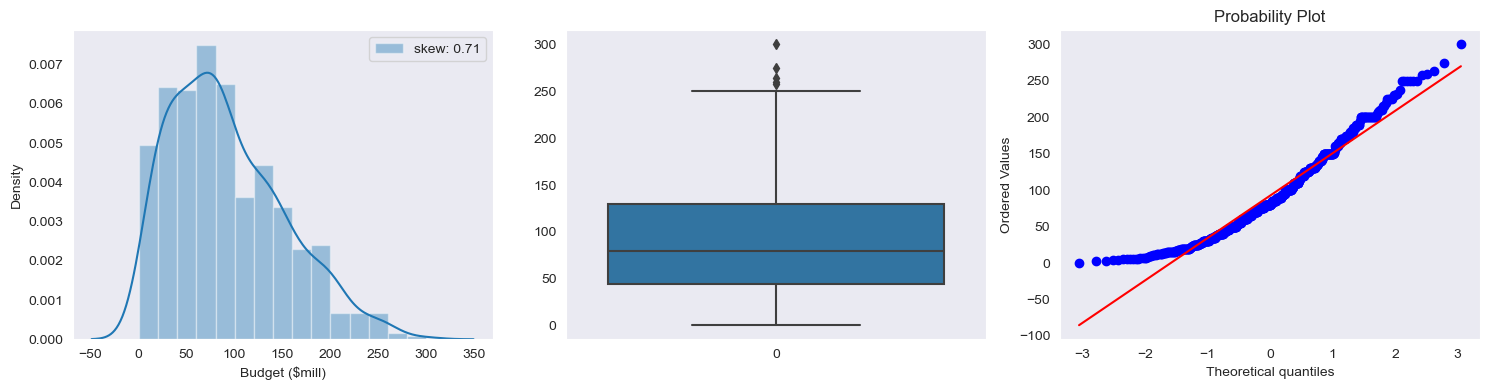

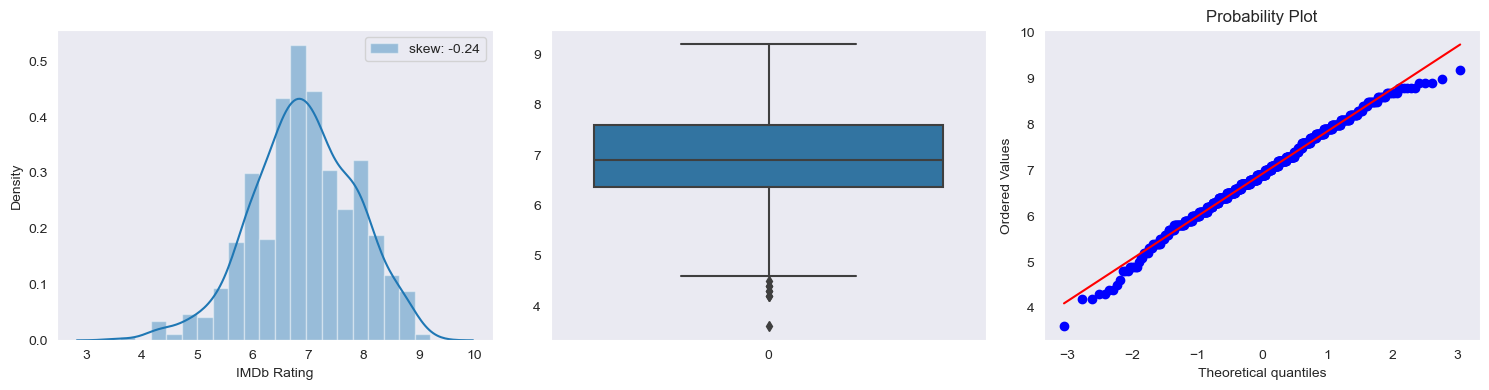

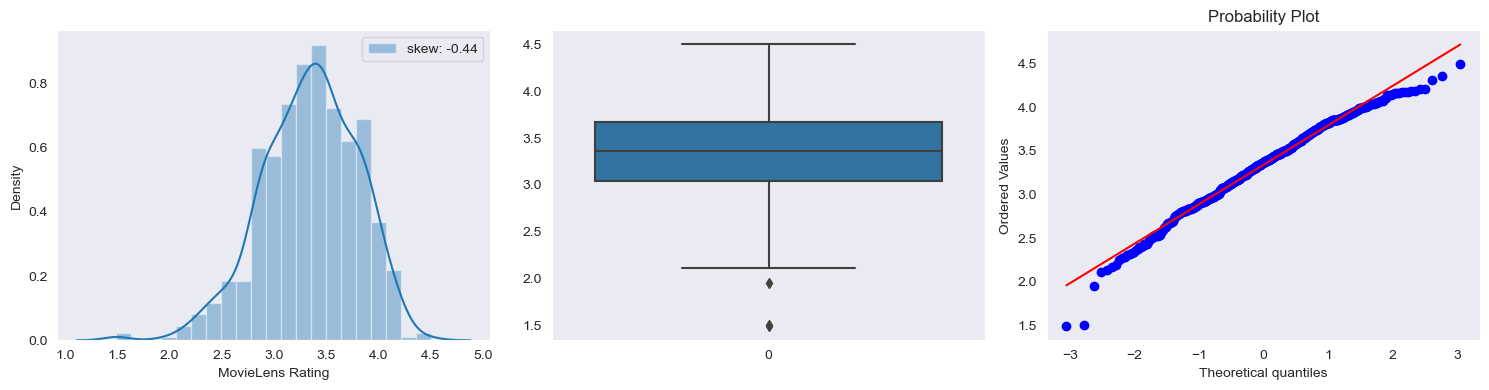

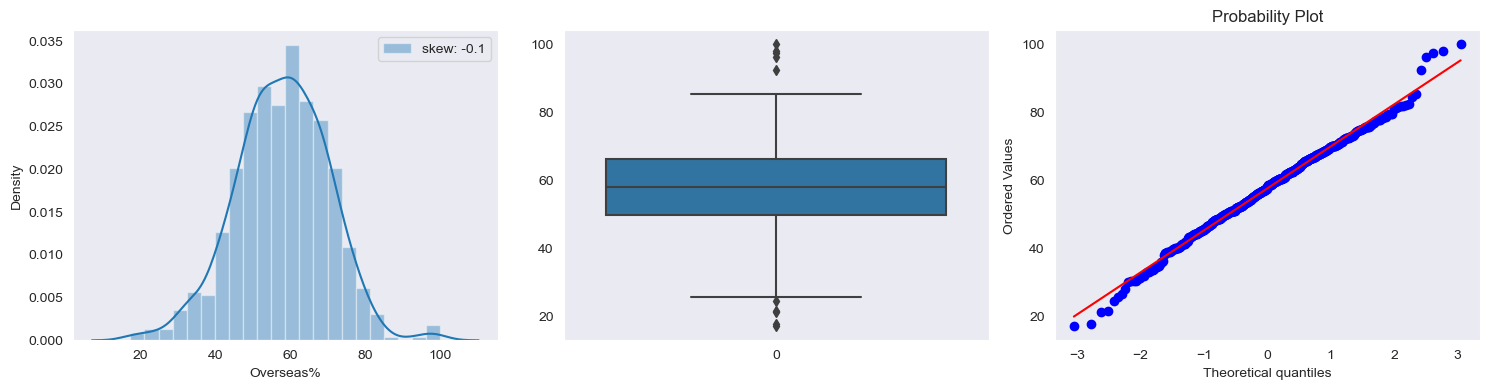

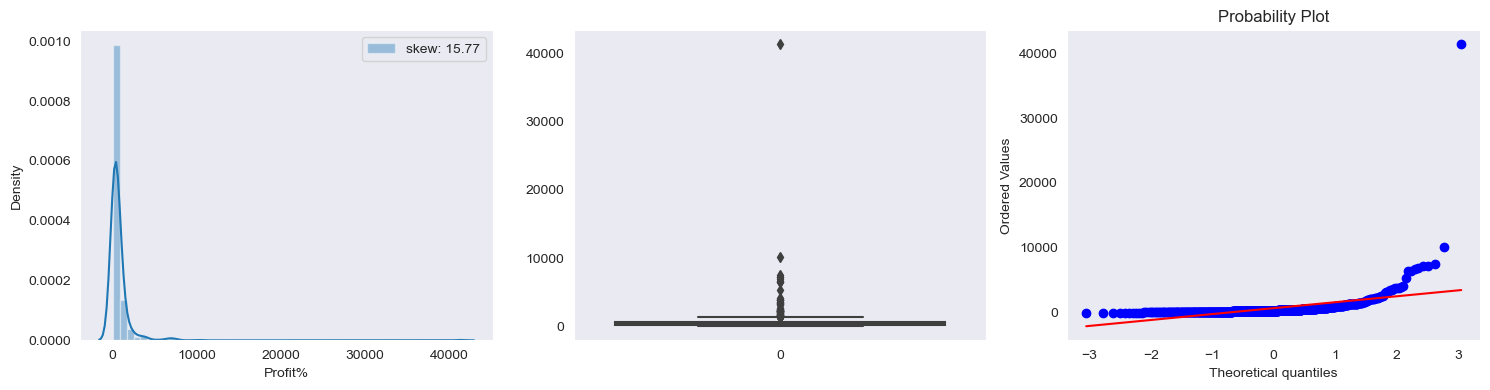

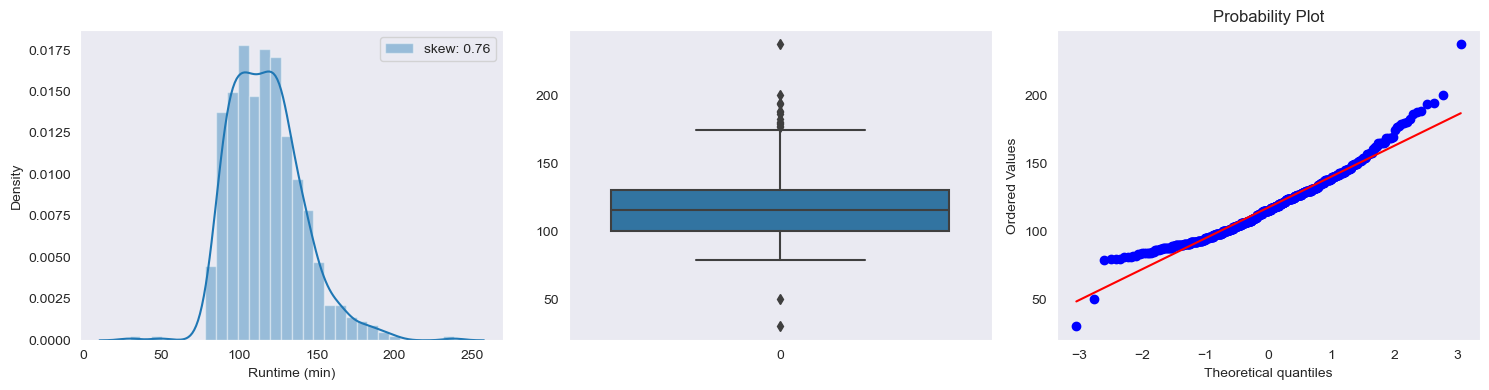

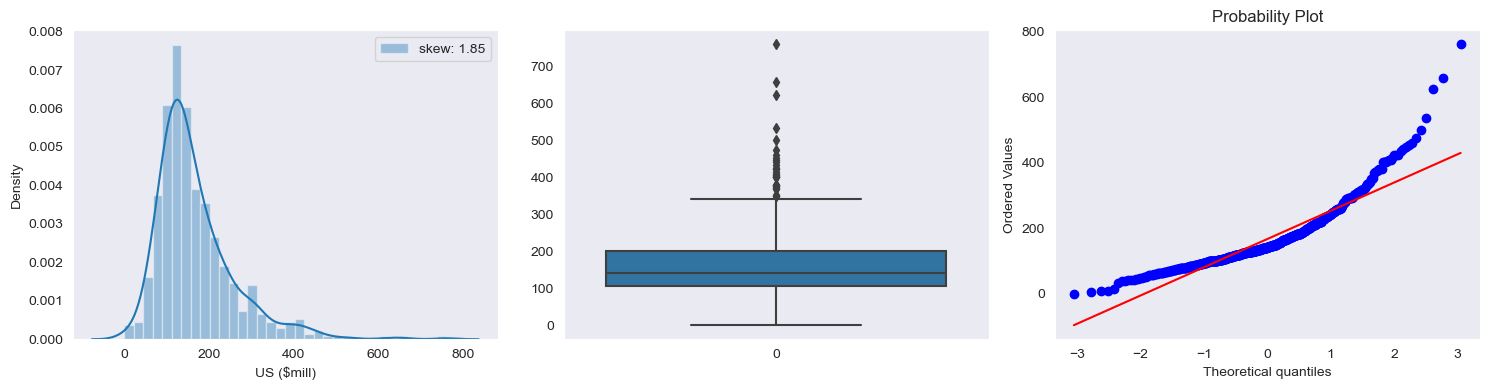

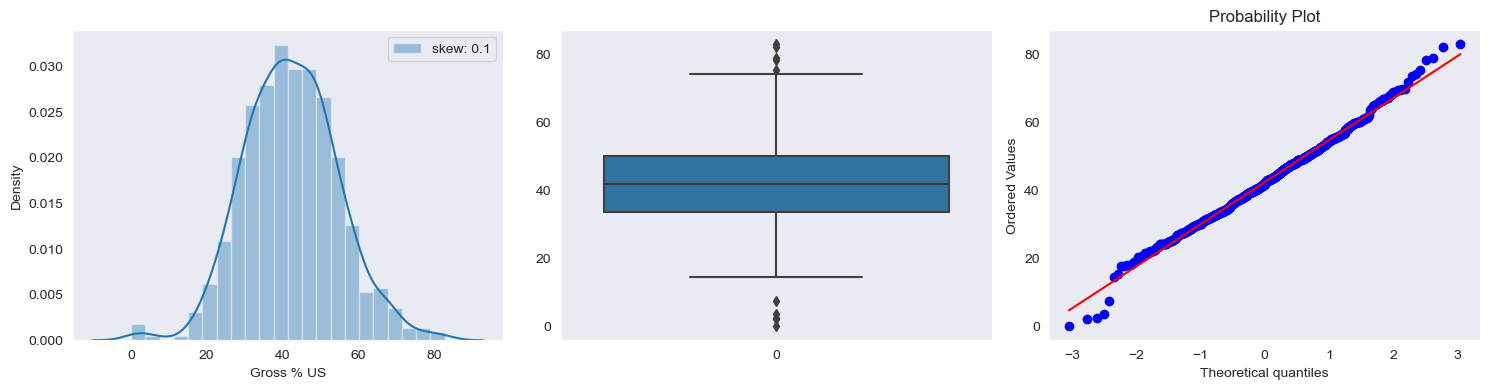

In [13]:
sns.set_style('dark')
for col in df.describe().columns:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col], plot=plt)
    plt.tight_layout()
plt.show()

In [14]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
start_date = '1989-12-31'
end_date = '2011-1-1'
ReleaseDate = pd.date_range(start=start_date, end=end_date)

In [15]:
genres = ['action','animation','comedy','drama','adventure']
studios = ['WB', 'Buena Vista Studios','Fox','Universal','Sony']
Day = ['Friday']
columns_to_compare = ['IMDb Rating', 'MovieLens Rating']
df['CumulativeScore'] = df[columns_to_compare].sum(axis=1)
df['CumulativeScoreAvg'] = df['CumulativeScore'] >= 10

In [16]:
df3 = df[(df['Genre'].isin(genres)) &  (df['Studio'].isin(studios)) &
  (df['Day of Week'].isin(Day)) & (df['CumulativeScoreAvg']) &  (df['Release Date'].isin(ReleaseDate))]

In [17]:
df3.shape

(95, 20)

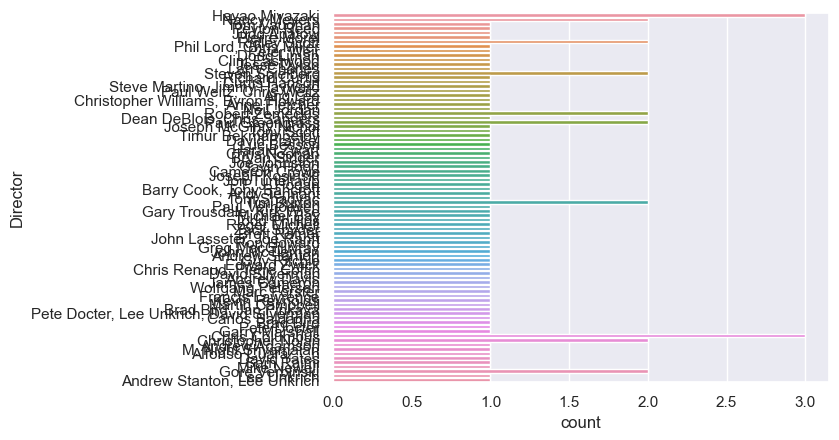

In [18]:
sns.set()
sns.countplot(y='Director',data = df3)
plt.show()

In [19]:
fig = go.Figure()
fig.add_trace(go.Scatter(
         x=df3['Movie Title'],
         y=df3['Genre'],
         name='Genre',
        line =dict(color='green'),
    opacity=0.8))

fig.add_trace(go.Scatter(
         x=df3['Movie Title'],
         y=df3['Studio'],
         name='Studio',
        line =dict(color='black'),
    opacity=0.8))

In [20]:

fig = go.Figure()
fig.add_trace(go.Scatter(
        x=df3['Movie Title'],
        y=df3['Director'],
        line =dict(color='blue'),
    opacity=0.8))

In [21]:

fig = go.Figure()
fig.add_trace(go.Scatter(
        y=df3['CumulativeScore'],
        x=df3['Movie Title'],
        line =dict(color='red'),
    opacity=0.8))

In [22]:

fig = go.Figure()
fig.add_trace(go.Scatter(
        y=df3['Release Date'],
        x=df3['Movie Title'],
        line =dict(color='orange'),
    opacity=0.8))

In [23]:
fig = go.Figure()
fig.add_trace(go.Scatter(
         x=df3['Movie Title'],
         y=df3['Budget ($mill)'],
         name='Budget',
    line=dict(color='blue'),
    opacity=0.8))

fig.add_trace(go.Scatter(
         x=df3['Movie Title'],
         y=df3['Gross ($mill)'],
         name='Gross',
    line=dict(color='orange'),
    opacity=0.8))

fig.show()

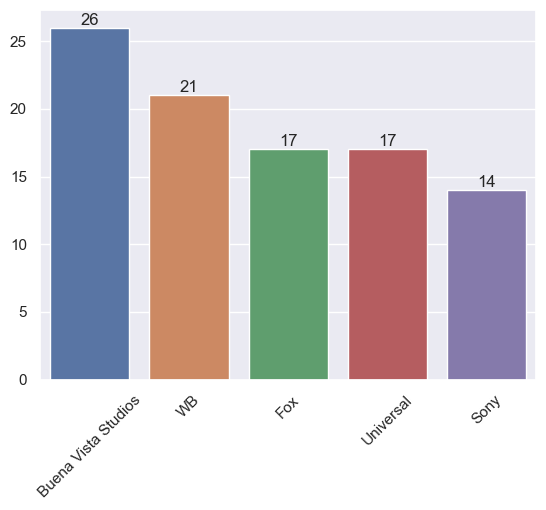

In [24]:
df.Studio.value_counts()

ax=sns.barplot(x=df3.Studio.value_counts()[:5].index , y=df3.Studio.value_counts()[:5].values )
ax.set_xticklabels(df3.Studio.value_counts()[:5].index,rotation=45)
for i in ax.containers:
    ax.bar_label(i);

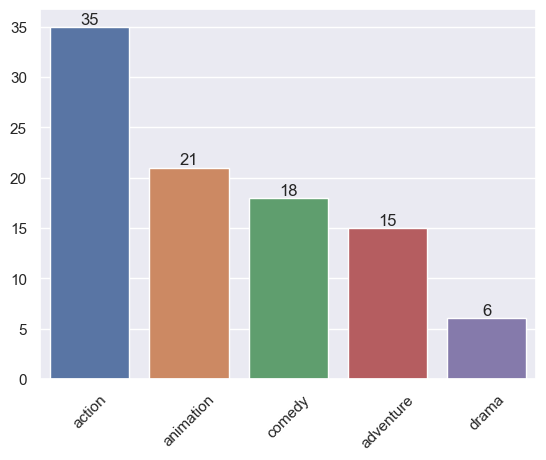

In [25]:
df.Genre.value_counts()

ax=sns.barplot(x=df3.Genre.value_counts()[:5].index , y=df3.Genre.value_counts()[:5].values )
ax.set_xticklabels(df3.Genre.value_counts()[:5].index,rotation=45)
for i in ax.containers:
    ax.bar_label(i);

In [26]:
df.isna()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US,CumulativeScore,CumulativeScoreAvg
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
604,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
605,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
606,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


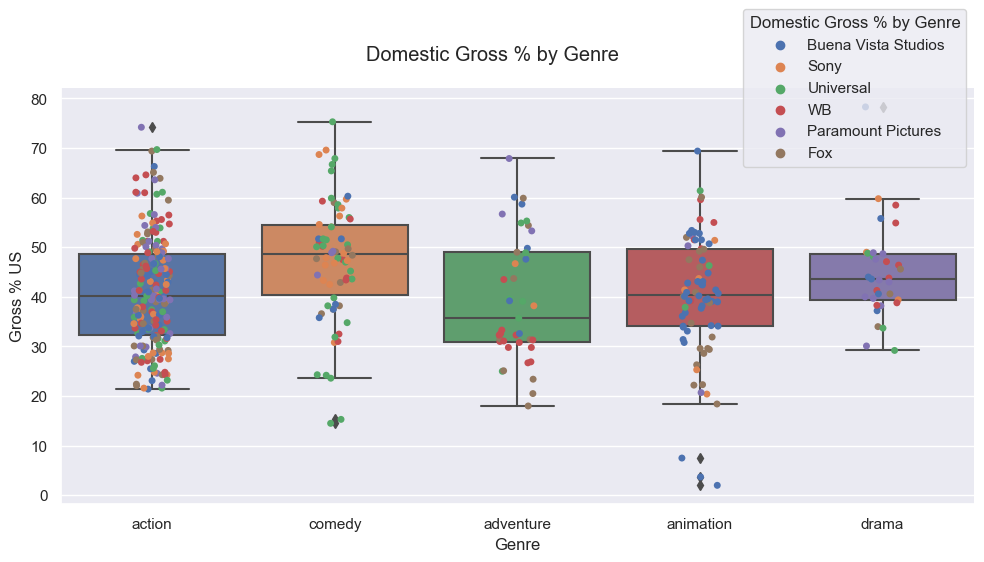

In [27]:
# Convert 'ReleaseDate' to datetime format
df['Release Date'] = pd.to_datetime(df['Release Date'])

# Set the 'ReleaseDate' column as the index
df.set_index('Release Date', inplace=True)

# Filter dataset based on Genres and Studios
genres = ['action', 'adventure', 'animation', 'comedy', 'drama']
studios = ['Buena Vista Studios', 'WB', 'Fox', 'Universal', 'Sony', 'Paramount Pictures']
df2 = df[(df['Genre'].isin(genres)) & (df['Studio'].isin(studios))]

#plt.figure(figsize=(10,10))

# Prepare the plot's data and aes layers
p = sns.catplot(data=df2, x='Genre', y='Gross % US', kind='box', aspect=2)
sns.stripplot(data=df2, x='Genre', y='Gross % US', hue='Studio', jitter=True , alpha=True)

# Adjust plot appearance
p.set_axis_labels("Genre", "Gross % US")
p.fig.suptitle("Domestic Gross % by Genre", y=1.05)

# Customize plot aesthetics
p.set_xticklabels
plt.legend(title='Domestic Gross % by Genre', bbox_to_anchor=(1, 1), loc='right')
plt.show()

In [28]:
# Convert "budget" and "gross" columns to strings
df['Budget ($mill)'] = df['Budget ($mill)'].astype(str)
df['Gross ($mill)'] = df['Gross ($mill)'].astype(str)

# Remove commas from the numerical values and convert to floats
df['Budget ($mill)'] = df['Budget ($mill)'].str.replace(',', '').astype(float)
df['Gross ($mill)'] = df['Gross ($mill)'].str.replace(',', '').astype(float)

# Extracting relevant columns
X = df['Budget ($mill)'].values.reshape(-1, 1)  # Features (budget)
y = df['Gross ($mill)'].values  # Target variable (gross revenue)


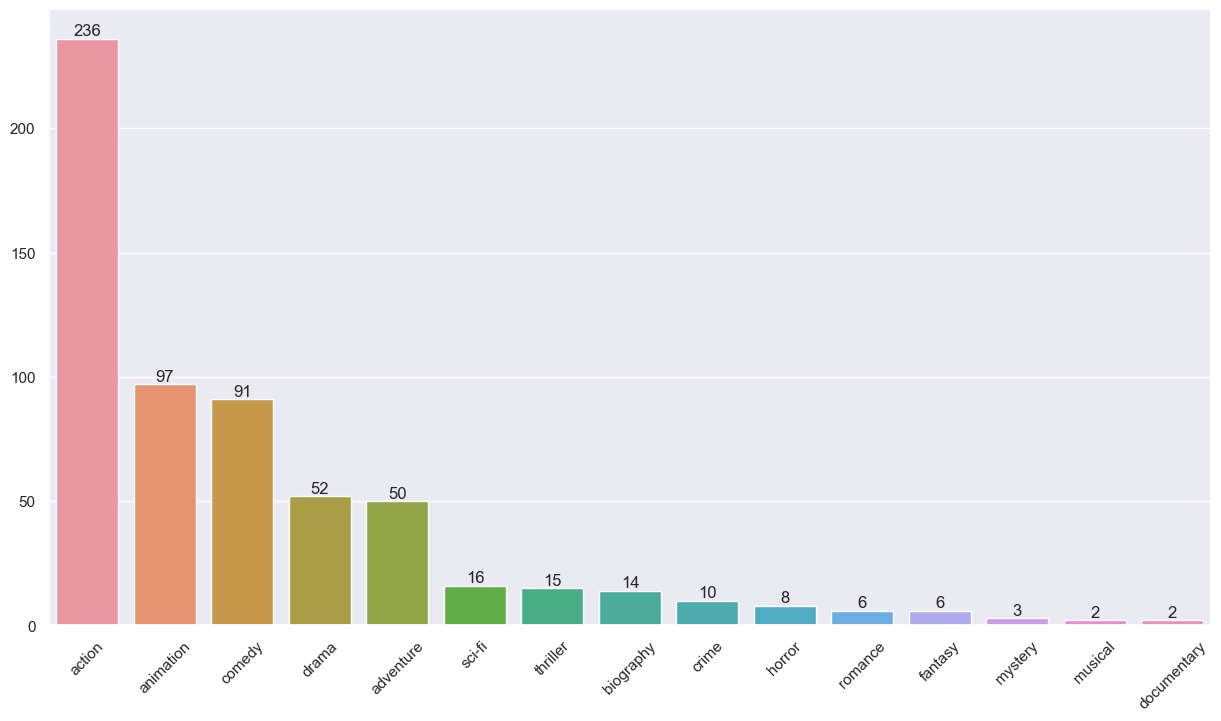

In [29]:
df.Genre.value_counts()

plt.figure(figsize=(15,8))

ax=sns.barplot(x=df.Genre.value_counts()[:15].index , y=df.Genre.value_counts()[:15].values )
ax.set_xticklabels(df.Genre.value_counts()[:15].index,rotation=45)
for i in ax.containers:
    ax.bar_label(i);

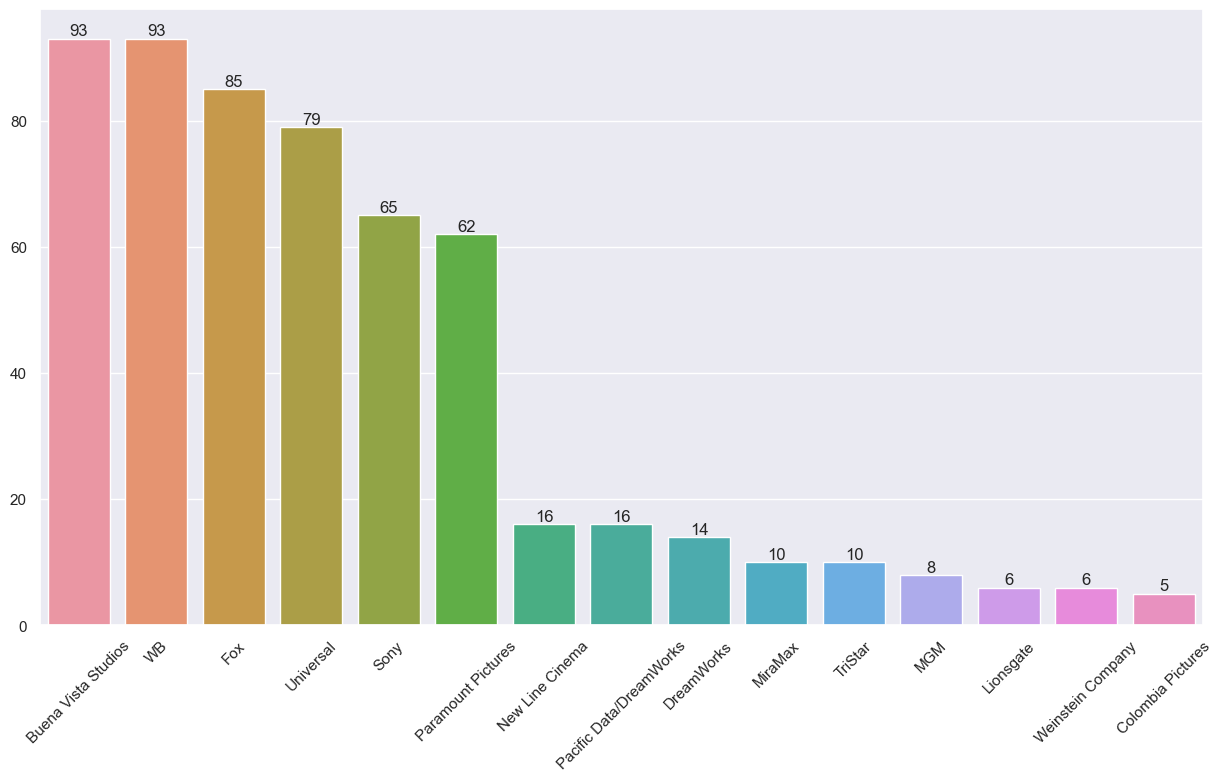

In [30]:
df.Studio.value_counts()

plt.figure(figsize=(15,8))

ax=sns.barplot(x=df.Studio.value_counts()[:15].index , y=df.Studio.value_counts()[:15].values )
ax.set_xticklabels(df.Studio.value_counts()[:15].index,rotation=45)
for i in ax.containers:
    ax.bar_label(i);

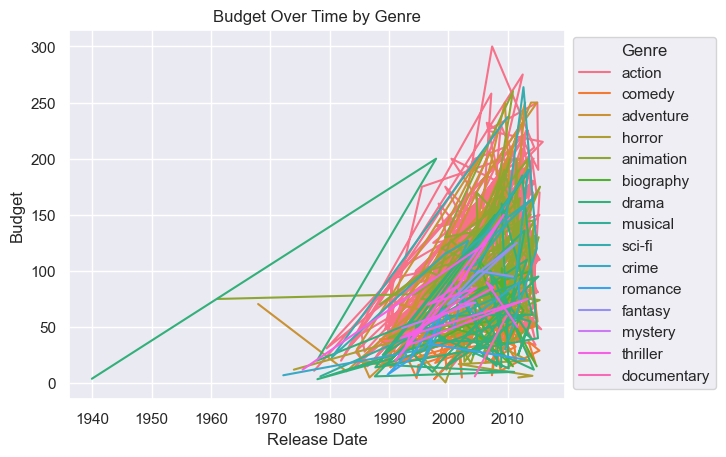

In [31]:
# Define a color palette for each genre
genre_palette = sns.color_palette('husl', n_colors=len(df['Genre'].unique()))

for i, genre in enumerate(df['Genre'].unique()):
    genre_data = df[df['Genre'] == genre]
    plt.plot(genre_data.index, genre_data['Budget ($mill)'], label=genre, color=genre_palette[i])

# Set plot labels and legend
plt.title('Budget Over Time by Genre')
plt.xlabel('Release Date')
plt.ylabel('Budget')
plt.legend(title='Genre', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

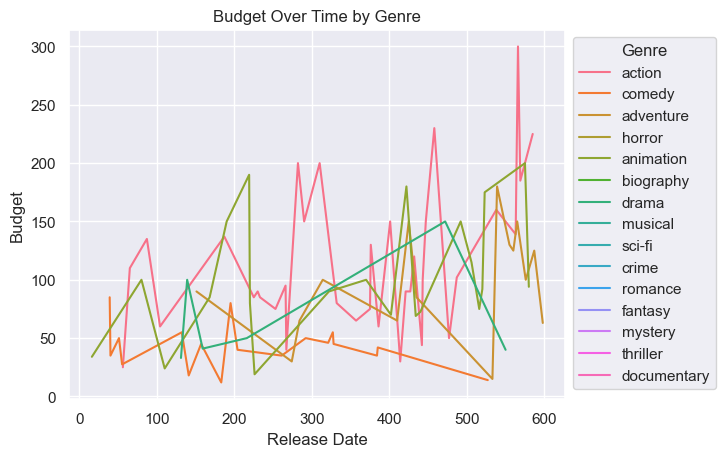

In [32]:
for i, genre in enumerate(df['Genre'].unique()):
    genre_data = df3[df3['Genre'] == genre]
    plt.plot(genre_data.index, genre_data['Budget ($mill)'], label=genre, color=genre_palette[i])

# Set plot labels and legend
plt.title('Budget Over Time by Genre')
plt.xlabel('Release Date')
plt.ylabel('Budget')
plt.legend(title='Genre', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

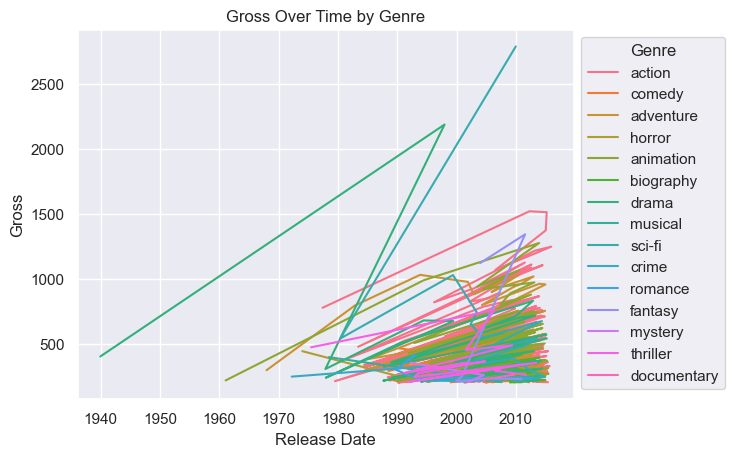

In [33]:

for i, genre in enumerate(df['Genre'].unique()):
    genre_data = df[df['Genre'] == genre]
    plt.plot(genre_data.index, genre_data['Gross ($mill)'], label=genre, color=genre_palette[i])

# Set plot labels and legend
plt.title('Gross Over Time by Genre')
plt.xlabel('Release Date')
plt.ylabel('Gross')
plt.legend(title='Genre', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

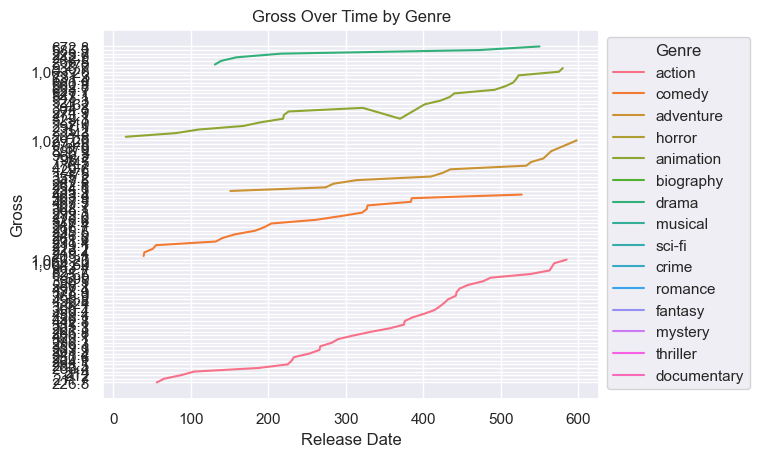

In [34]:
for i, genre in enumerate(df['Genre'].unique()):
    genre_data = df3[df3['Genre'] == genre]
    plt.plot(genre_data.index, genre_data['Gross ($mill)'], label=genre, color=genre_palette[i])

# Set plot labels and legend
plt.title('Gross Over Time by Genre')
plt.xlabel('Release Date')
plt.ylabel('Gross')
plt.legend(title='Genre', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

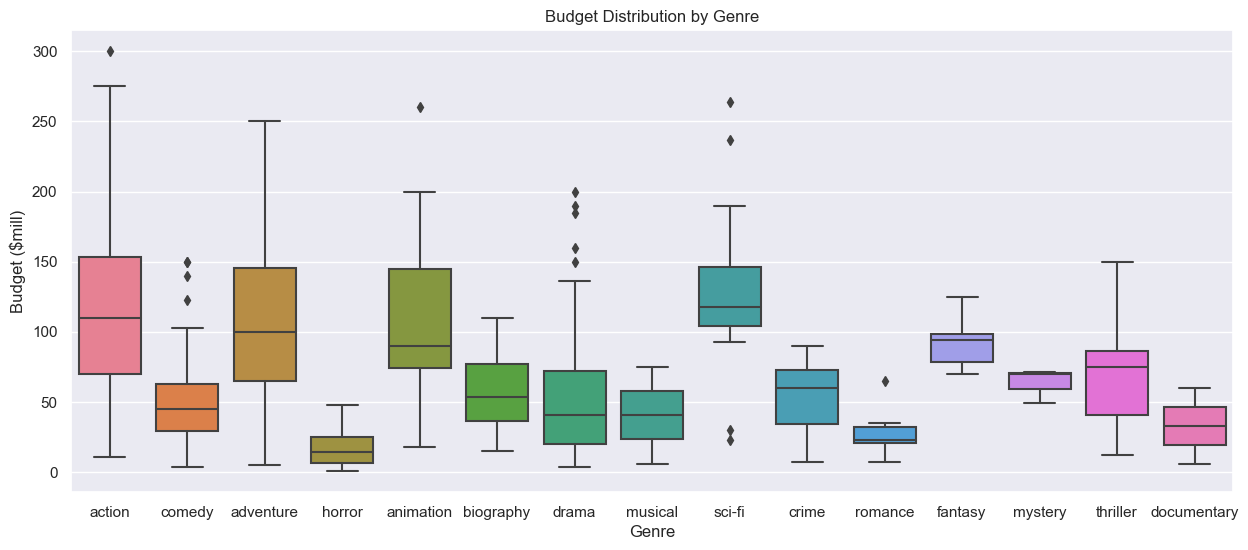

In [35]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Genre', y='Budget ($mill)', data=df, palette=genre_palette)
plt.title('Budget Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Budget ($mill)')
plt.show()

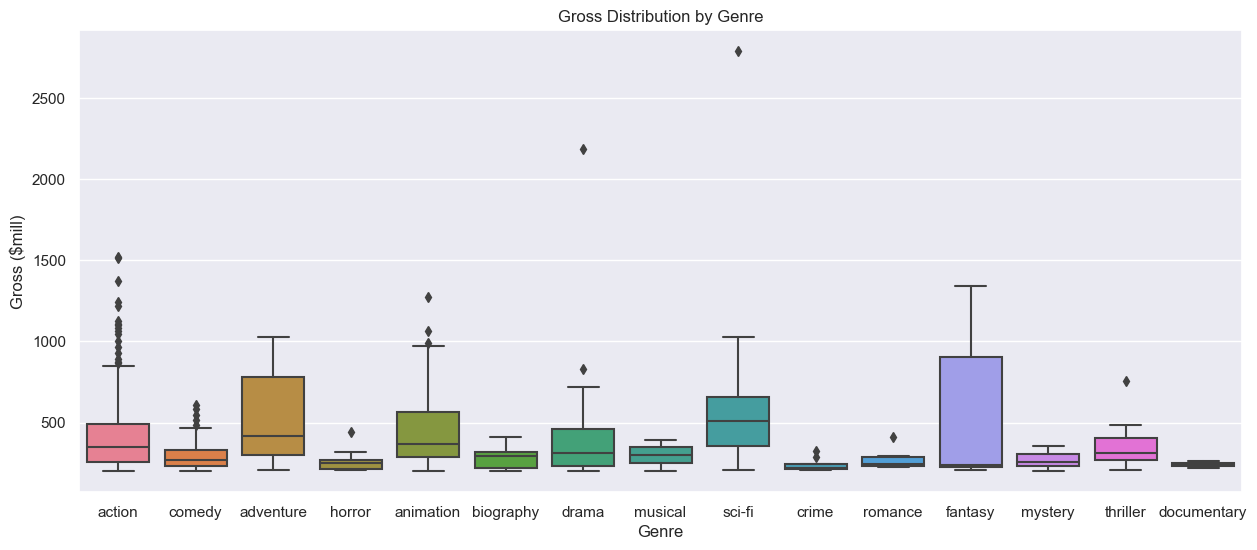

In [36]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Genre', y='Gross ($mill)', data=df, palette=genre_palette)
plt.title('Gross Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Gross ($mill)')
plt.show()

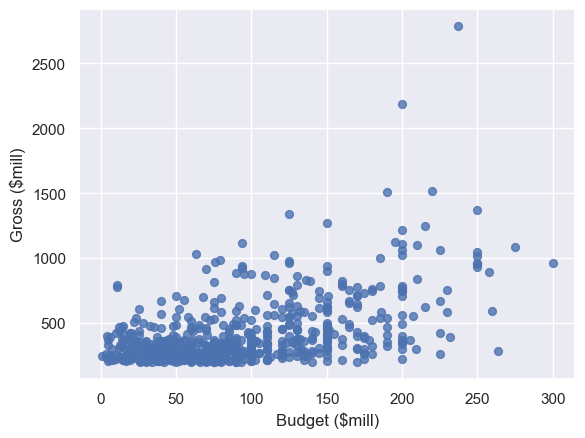

In [37]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Budget ($mill)', y='Gross ($mill)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(True)

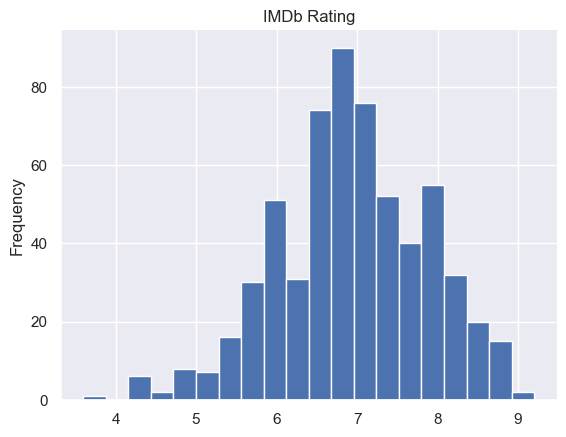

In [38]:
# @title IMDb Rating

from matplotlib import pyplot as plt
df['IMDb Rating'].plot(kind='hist', bins=20, title='IMDb Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

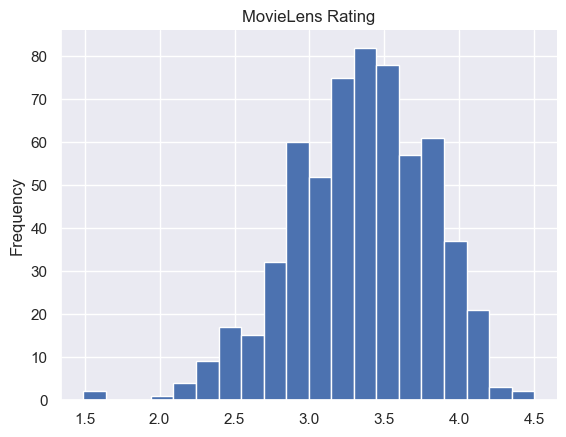

In [39]:
# @title MovieLens Rating

from matplotlib import pyplot as plt
df['MovieLens Rating'].plot(kind='hist', bins=20, title='MovieLens Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

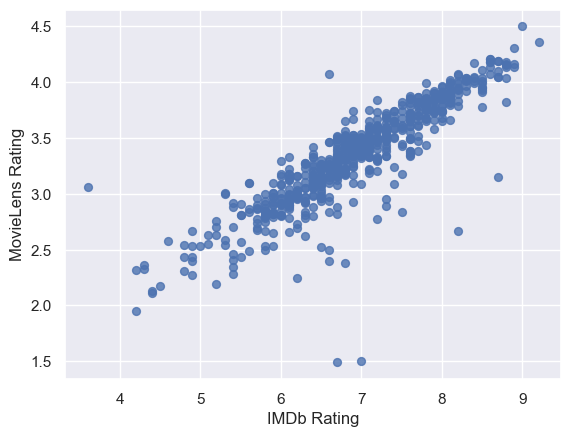

In [40]:
# @title IMDb Rating vs MovieLens Rating
import itertools
colors = itertools.cycle(["r", "b", "g"])

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='IMDb Rating', y='MovieLens Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(True)

In [41]:
numeric_columns = ['IMDb Rating', 'MovieLens Rating']
print("Descriptive Statistics:")
df[numeric_columns].describe()

Descriptive Statistics:


,IMDb Rating,MovieLens Rating
count,608.000000,608.000000
mean,6.923849,3.340378
std,0.925890,0.454071
min,3.600000,1.490000
25%,6.375000,3.037500
50%,6.900000,3.365000
75%,7.600000,3.672500
max,9.200000,4.500000


In [42]:
# Unique genres
genre = df['Genre'].unique()
print(genre)

['action' 'comedy' 'adventure' 'horror' 'animation' 'biography' 'drama'
 'musical' 'sci-fi' 'crime' 'romance' 'fantasy' 'mystery' 'thriller'
 'documentary']


In [43]:
avg_scores_by_genre = df.groupby('Genre')[numeric_columns].mean()
print("\nAverage Scores by Genre:")
print(avg_scores_by_genre)


Average Scores by Genre:
             IMDb Rating  MovieLens Rating
Genre                                     
action          6.790678          3.281271
adventure       7.072000          3.423000
animation       6.976289          3.335979
biography       7.800000          3.779286
comedy          6.585714          3.193736
crime           7.800000          3.761000
documentary     7.550000          3.470000
drama           7.192308          3.471731
fantasy         7.550000          3.581667
horror          6.550000          3.176250
musical         7.000000          3.375000
mystery         6.766667          3.323333
romance         6.883333          3.366667
sci-fi          7.443750          3.545625
thriller        7.253333          3.510667


In [44]:
# Studio Analysis
studio_counts = df['Studio'].value_counts()
print("\nStudio Distribution:")
print(studio_counts)


Studio Distribution:
Buena Vista Studios         93
WB                          93
Fox                         85
Universal                   79
Sony                        65
Paramount Pictures          62
New Line Cinema             16
Pacific Data/DreamWorks     16
DreamWorks                  14
MiraMax                     10
TriStar                     10
MGM                          8
Lionsgate                    6
Weinstein Company            6
Colombia Pictures            5
WB/New Line                  5
Fox Searchlight Pictures     4
Summit Entertainment         4
Lionsgate/Summit             4
Orion                        2
Screen Gems                  2
Revolution Studios           2
UA Entertainment             2
Gramercy Pictures            2
Disney                       2
Vestron Pictures             1
IFC                          1
USA                          1
Art House Studios            1
Sony Picture Classics        1
Dimension Films              1
Lionsgate Films  

In [45]:
# Average scores by studio
avg_scores_by_studio = df.groupby('Studio')[numeric_columns].mean()
print("\nAverage Scores by Studio:")
print(avg_scores_by_studio)


Average Scores by Studio:
                          IMDb Rating  MovieLens Rating
Studio                                                 
Art House Studios            6.400000          2.880000
Buena Vista Studios          7.053763          3.418602
Colombia Pictures            6.860000          3.482000
Dimension Films              5.400000          2.460000
Disney                       7.000000          3.400000
DreamWorks                   7.285714          3.544286
Fox                          6.818824          3.268471
Fox Searchlight Pictures     7.375000          3.635000
Gramercy Pictures            7.300000          3.510000
IFC                          6.600000          3.460000
Lionsgate                    6.850000          3.321667
Lionsgate Films              7.500000          3.570000
Lionsgate/Summit             7.300000          3.197500
MGM                          7.162500          3.382500
MiraMax                      7.660000          3.700000
New Line Cinema      

In [46]:
# Correlation Analysis
correlation_matrix = df[numeric_columns].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                  IMDb Rating  MovieLens Rating
IMDb Rating          1.000000          0.879836
MovieLens Rating     0.879836          1.000000


In [47]:
from scipy.stats import chisquare,chi2_contingency,ttest_ind
# Chi-square Test
stat, p, dof, expected = chi2_contingency(pd.crosstab(df['Budget ($mill)'], df['Profit ($mill)']))

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.004643954571345556
Dependent (reject H0)


In [48]:
# Chi-square Test
stat, p, dof, expected = chi2_contingency(pd.crosstab(df['Genre'], df['Studio']))

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 5.973414741156007e-58
Dependent (reject H0)


In [51]:
columns_to_compare = ['IMDb Rating', 'MovieLens Rating']

df['CumulativeScore'] = df[columns_to_compare].sum(axis=1)

genres = df['Genre'].unique()

for genre in genres:
    genre_data = df[df['Genre'] == genre]['CumulativeScore']
    overall_data = df['CumulativeScore']

    t_stat, p_value = ttest_ind(genre_data, overall_data, equal_var=False)

    print(f"T-Test for {genre} vs. Overall Cumulative Score:")
    print(f"  T-Statistic: {t_stat}")
    print(f"  p-value: {p_value}")
    print("\n")

T-Test for action vs. Overall Cumulative Score:
  T-Statistic: -1.8951459210056691
  p-value: 0.05873418683861776


T-Test for comedy vs. Overall Cumulative Score:
  T-Statistic: -3.8782923413525783
  p-value: 0.000163134679137054


T-Test for adventure vs. Overall Cumulative Score:
  T-Statistic: 1.304492604481526
  p-value: 0.19706868647618814


T-Test for horror vs. Overall Cumulative Score:
  T-Statistic: -1.1986650039812727
  p-value: 0.2685639601667387


T-Test for animation vs. Overall Cumulative Score:
  T-Statistic: 0.3186857180494515
  p-value: 0.7504902927414421


T-Test for biography vs. Overall Cumulative Score:
  T-Statistic: 6.367505646945857
  p-value: 1.2587563265855385e-05


T-Test for drama vs. Overall Cumulative Score:
  T-Statistic: 1.7522023278295609
  p-value: 0.08508610338754549


T-Test for musical vs. Overall Cumulative Score:
  T-Statistic: 0.7609560104969005
  p-value: 0.5569719674500155


T-Test for sci-fi vs. Overall Cumulative Score:
  T-Statistic: 2.3938

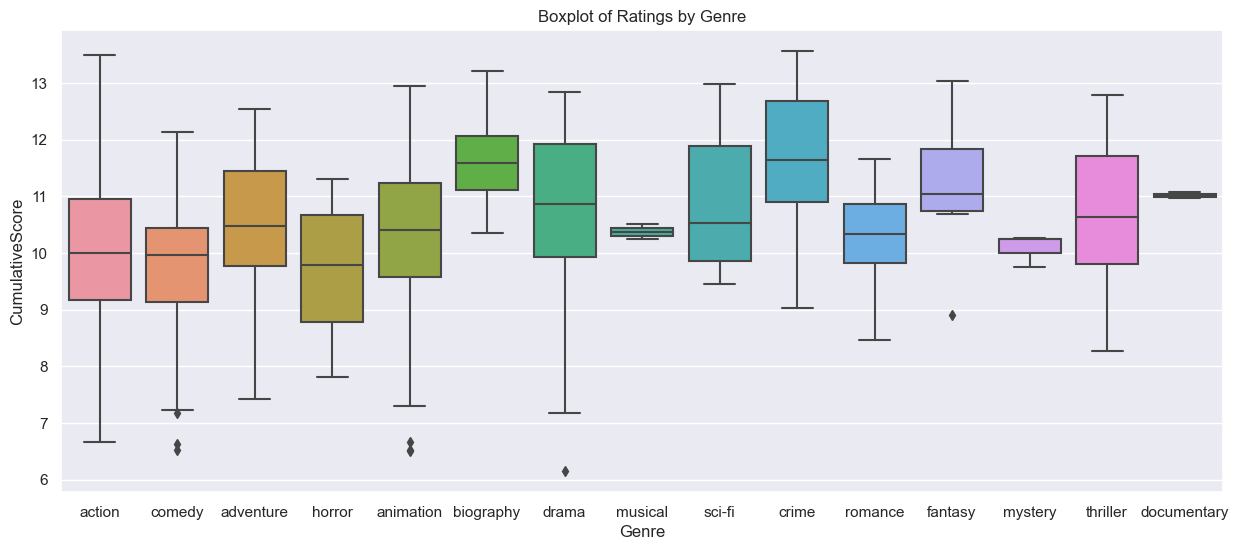

In [52]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Genre', y='CumulativeScore', data=df)
plt.title('Boxplot of Ratings by Genre')
plt.show()

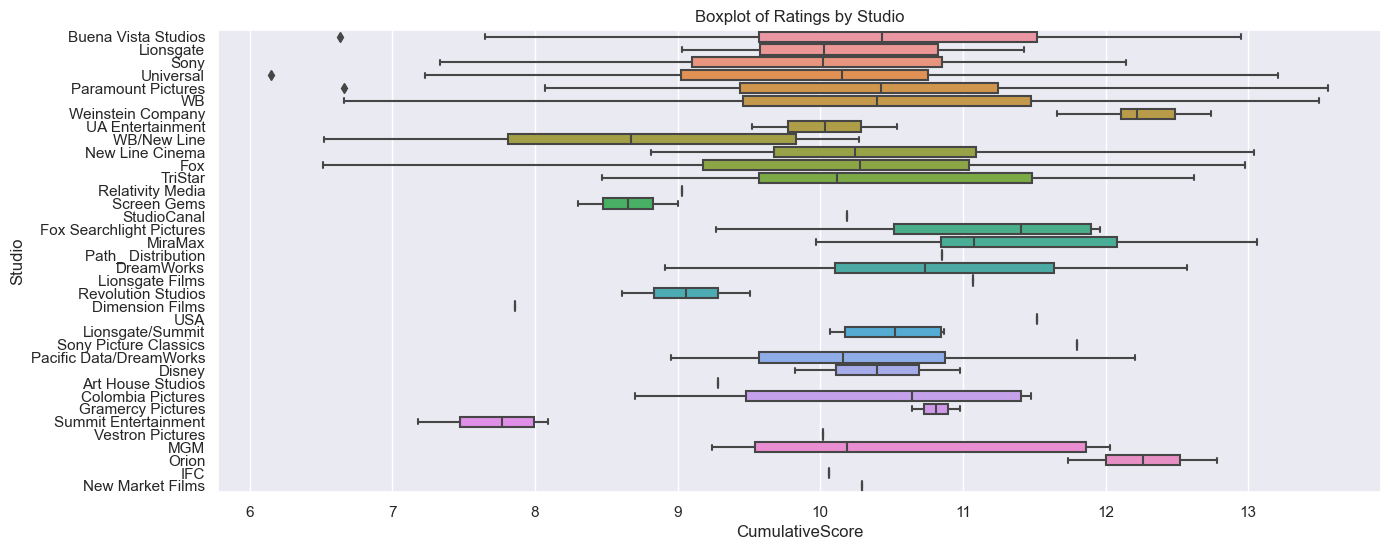

In [66]:
plt.figure(figsize=(15, 6))
sns.boxplot(y='Studio', x='CumulativeScore', data=df)
plt.title('Boxplot of Ratings by Studio')
plt.show()

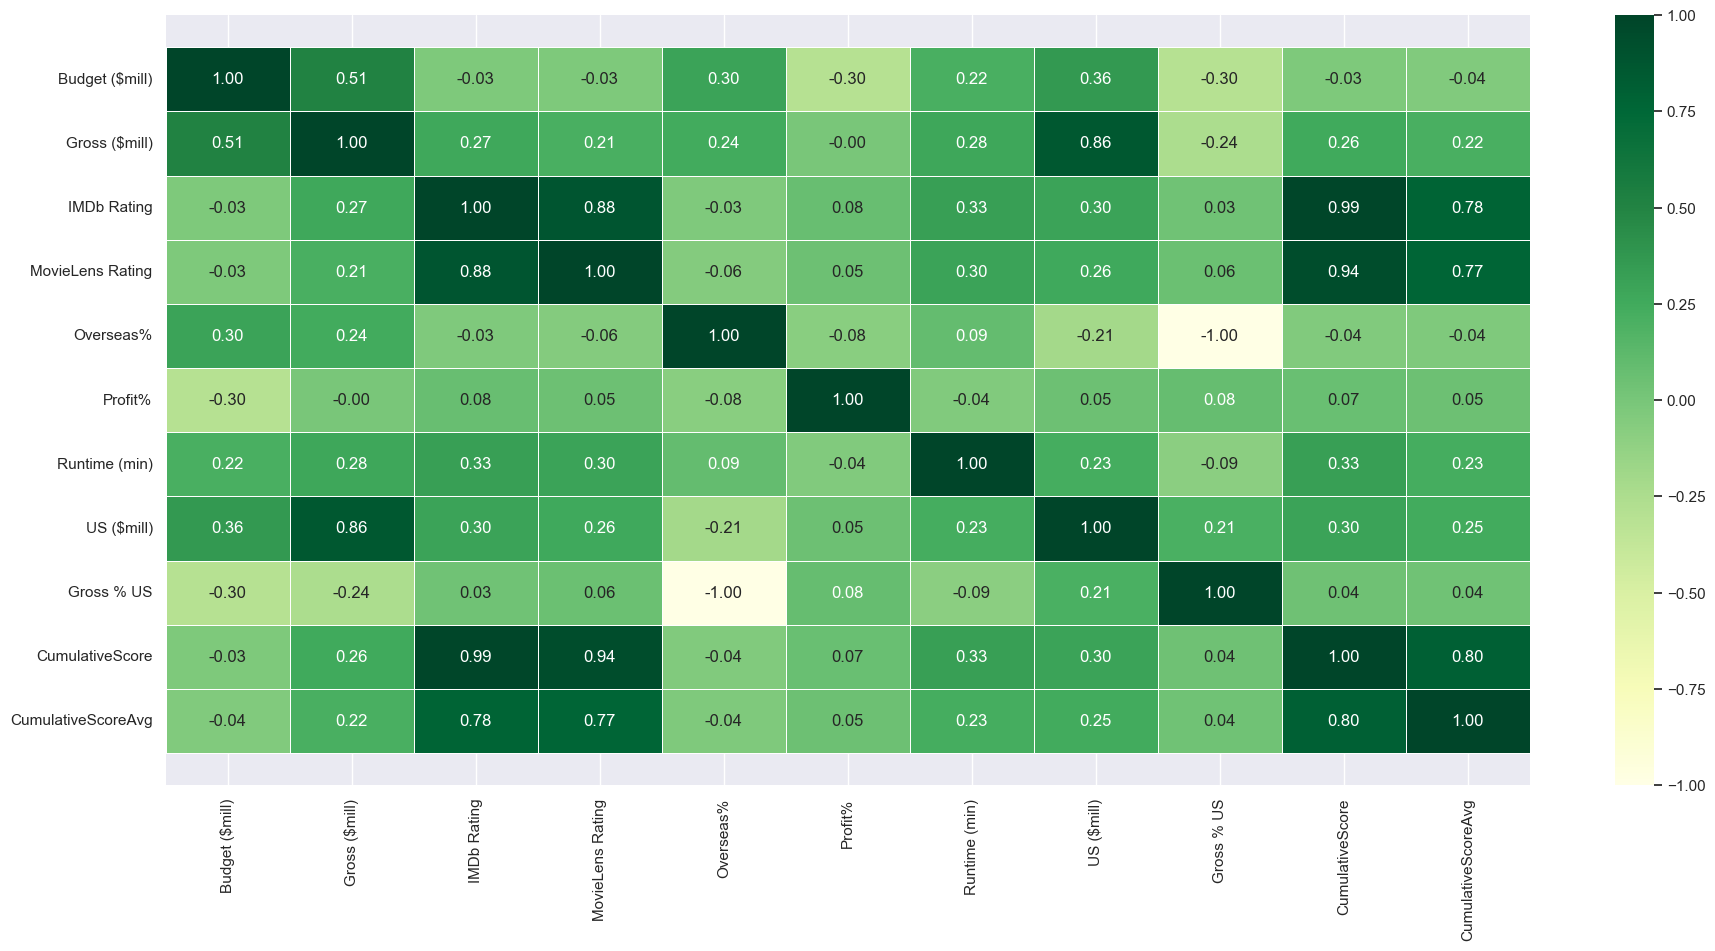

In [53]:
df_corr = df.corr().transpose()

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

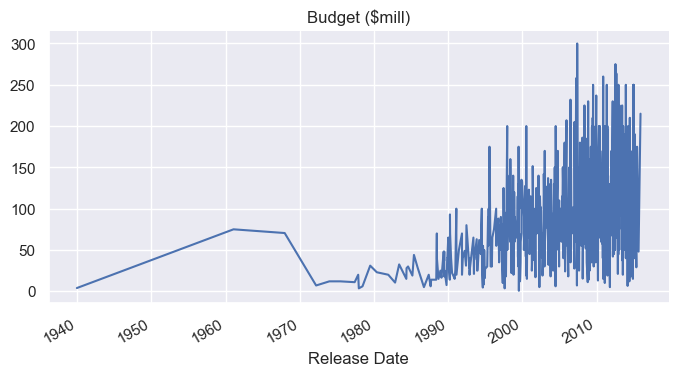

In [54]:
from matplotlib import pyplot as plt
df['Budget ($mill)'].plot(kind='line', figsize=(8, 4), title='Budget ($mill)')
plt.gca().spines[['top', 'right']].set_visible(False)

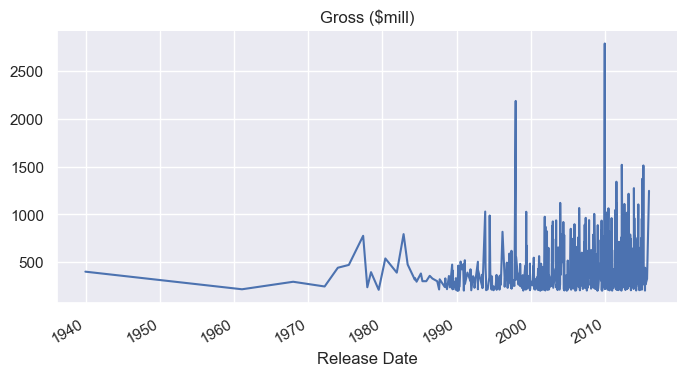

In [55]:
df['Gross ($mill)'].plot(kind='line', figsize=(8, 4), title='Gross ($mill)')
plt.gca().spines[['top', 'right']].set_visible(False)

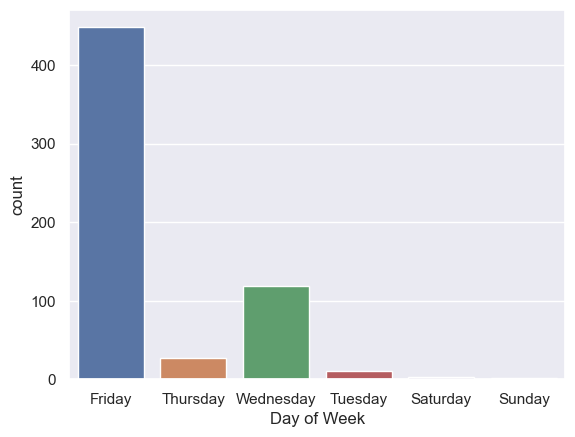

In [56]:
# Activate Seaborn
sns.set()

# Bar chart for Day of Week
sns.countplot(x='Day of Week', data=df)
plt.show()

Mean Squared Error: 41047.5338401622
Mean Absolute Error: 143.65292503619952
R-squared: 0.2621734109749626


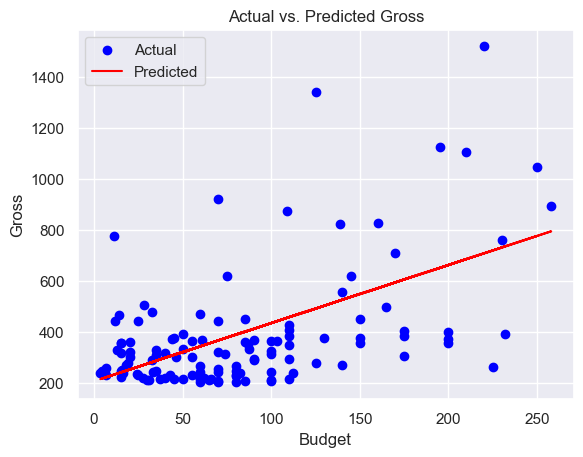

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Convert "budget" and "gross" columns to strings
df['Budget ($mill)'] = df['Budget ($mill)'].astype(str)
df['Gross ($mill)'] = df['Gross ($mill)'].astype(str)

# Remove commas from the numerical values and convert to floats
df['Budget ($mill)'] = df['Budget ($mill)'].str.replace(',', '').astype(float)
df['Gross ($mill)'] = df['Gross ($mill)'].str.replace(',', '').astype(float)

# Extracting relevant columns
X = df['Budget ($mill)'].values.reshape(-1, 1)  # Features (budget)
y = df['Gross ($mill)'].values  # Target variable (gross)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
LR_df_mse = mean_squared_error(y_test, y_pred)
LR_df_mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", LR_df_mse)
print("Mean Absolute Error:", LR_df_mae)
print("R-squared:", r2)

# Plot the actual vs. predicted gross
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Actual vs. Predicted Gross')
plt.legend()
plt.show()

Mean Squared Error: 23779.94952683094
Mean Absolute Error: 121.92970813488196
R-squared: 0.4183773702212825


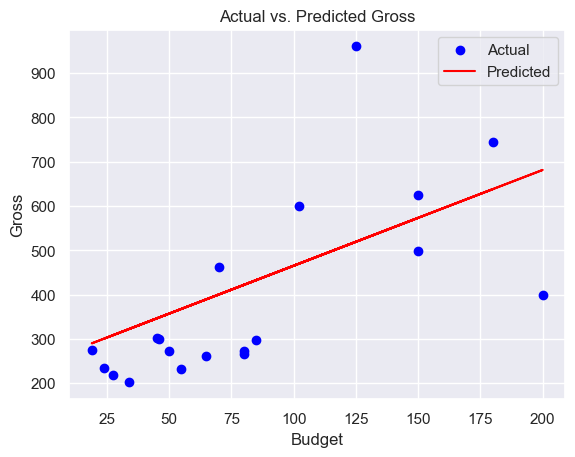

In [58]:


# Convert "budget" and "gross" columns to strings
df3['Budget ($mill)'] = df3['Budget ($mill)'].astype(str)
df3['Gross ($mill)'] = df3['Gross ($mill)'].astype(str)

# Remove commas from the numerical values and convert to floats
df3['Budget ($mill)'] = df3['Budget ($mill)'].str.replace(',', '').astype(float)
df3['Gross ($mill)'] = df3['Gross ($mill)'].str.replace(',', '').astype(float)

# Extracting relevant columns
X = df3['Budget ($mill)'].values.reshape(-1, 1)  # Features (budget)
y = df3['Gross ($mill)'].values  # Target variable (gross)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
LR_df3_mse = mean_squared_error(y_test, y_pred)
LR_df3_mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", LR_df3_mse)
print("Mean Absolute Error:", LR_df3_mae)
print("R-squared:", r2)

# Plot the actual vs. predicted gross
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Actual vs. Predicted Gross')
plt.legend()
plt.show()

Mean Squared Error: 9529.756465771958
Mean Absolute Error: 74.49440659983263


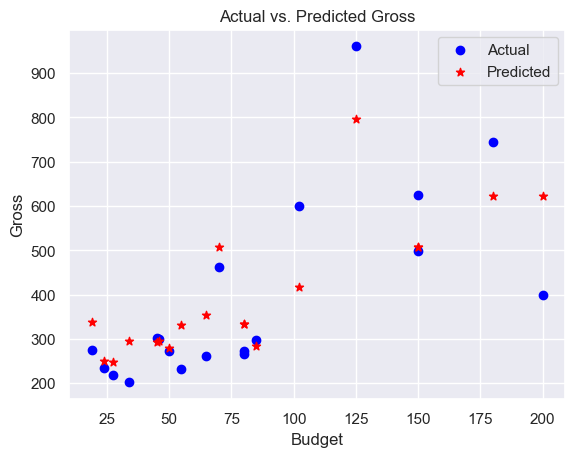

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'budget' as feature and 'revenue' as target variable for regression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
RF_df_mse = mean_squared_error(y_test, y_pred)
RF_df_mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", RF_df_mse)
print("Mean Absolute Error:", RF_df_mae)

# Plot the actual vs. predicted gross
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted', marker='*')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Actual vs. Predicted Gross')
plt.legend()
plt.show()

Mean Squared Error: 9529.756465771958
Mean Absolute Error: 74.49440659983263


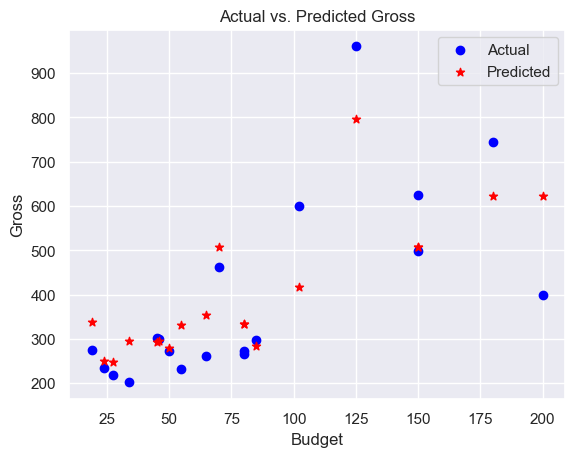

In [60]:



# Convert "budget" and "gross" columns to strings
df3['Budget ($mill)'] = df3['Budget ($mill)'].astype(str)
df3['Gross ($mill)'] = df3['Gross ($mill)'].astype(str)

# Remove commas from the numerical values and convert to floats
df3['Budget ($mill)'] = df3['Budget ($mill)'].str.replace(',', '').astype(float)
df3['Gross ($mill)'] = df3['Gross ($mill)'].str.replace(',', '').astype(float)

# Extracting relevant columns
X = df3['Budget ($mill)'].values.reshape(-1, 1)  # Features (budget)
y = df3['Gross ($mill)'].values  # Target variable (gross)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
RF_df3_mse = mean_squared_error(y_test, y_pred)
RF_df3_mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", RF_df3_mse)
print("Mean Absolute Error:", RF_df3_mae)

# Plot the actual vs. predicted gross
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted', marker='*')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Actual vs. Predicted Gross')
plt.legend()
plt.show()

Mean Squared Error: 52547.703387736066
Mean Absolute Error: 128.7940520346312
R-squared: 0.05545865672110495


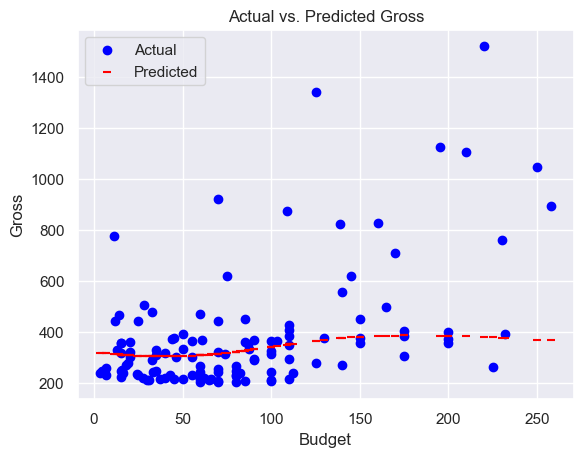

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
import matplotlib.pyplot as plt


# Convert "budget" and "gross" columns to strings
df['Budget ($mill)'] = df['Budget ($mill)'].astype(str)
df['Gross ($mill)'] = df['Gross ($mill)'].astype(str)

# Remove commas from the numerical values and convert to floats
df['Budget ($mill)'] = df['Budget ($mill)'].str.replace(',', '').astype(float)
df['Gross ($mill)'] = df['Gross ($mill)'].str.replace(',', '').astype(float)

# Extracting relevant columns
X = df['Budget ($mill)'].values.reshape(-1, 1)  # Features (budget)
y = df['Gross ($mill)'].values  # Target variable (gross)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train a Support Vector Regressor (SVR) model
model = SVR()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error
SVM_df_mse = mean_squared_error(y_test, y_pred)
SVM_df_mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {SVM_df_mse}")
print(f"Mean Absolute Error: {SVM_df_mae}")
print("R-squared:", r2)

# Plot the actual vs. predicted gross
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted', marker='_')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Actual vs. Predicted Gross')
plt.legend()
plt.show()


Mean Squared Error: 39917.03486049223
Mean Absolute Error: 152.34989506290498
R-squared: 0.023687970307386008


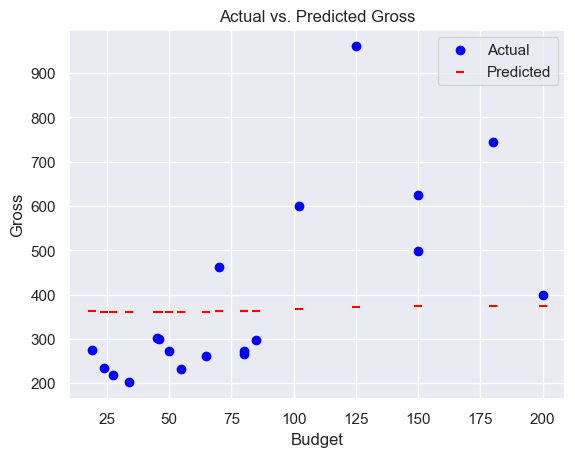

In [62]:


# Convert "budget" and "gross" columns to strings
df3['Budget ($mill)'] = df3['Budget ($mill)'].astype(str)
df3['Gross ($mill)'] = df3['Gross ($mill)'].astype(str)

# Remove commas from the numerical values and convert to floats
df3['Budget ($mill)'] = df3['Budget ($mill)'].str.replace(',', '').astype(float)
df3['Gross ($mill)'] = df3['Gross ($mill)'].str.replace(',', '').astype(float)

# Extracting relevant columns
X = df3['Budget ($mill)'].values.reshape(-1, 1)  # Features (budget)
y = df3['Gross ($mill)'].values  # Target variable (gross revenue)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train a Support Vector Regressor (SVR) model
model = SVR()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error
SVM_df3_mse = mean_squared_error(y_test, y_pred)
SVM_df3_mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {SVM_df3_mse}")
print(f"Mean Absolute Error: {SVM_df3_mae}")
print("R-squared:", r2)

# Plot the actual vs. predicted gross
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted', marker='_')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Actual vs. Predicted Gross')
plt.legend()
plt.show()


In [63]:
BestMeanSquareError = {
     'Random Forest': RF_df_mse,
     'Linear Regression': LR_df_mse,
     'SVM': SVM_df_mse
}
BestMeanAbsoluteError = {
     'Random Forest': RF_df_mae,
     'Linear Regression': LR_df_mae,
     'SVM': SVM_df_mae
}
best_model_mse = min(BestMeanSquareError, key=BestMeanSquareError.get)
best_model_mae = min(BestMeanAbsoluteError, key=BestMeanAbsoluteError.get)

print(f'The best model based on Mean Square Error is: {best_model_mse}')
print(f'The best model based on Mean Absolute Error is: {best_model_mae}')

The best model based on Mean Square Error is: Random Forest
The best model based on Mean Absolute Error is: Random Forest


In [64]:
BestMeanSquareError = {
    'Random Forest': RF_df3_mse,
    'Linear Regression': LR_df3_mse,
    'SVM': SVM_df3_mse
}
BestMeanAbsoluteError = {
    'Random Forest': RF_df3_mae,
    'Linear Regression': LR_df3_mae,
    'SVM': SVM_df3_mae
}
best_model_mse = min(BestMeanSquareError, key=BestMeanSquareError.get)
best_model_mae = min(BestMeanAbsoluteError, key=BestMeanAbsoluteError.get)

print(f'The best model based on Mean Square Error is: {best_model_mse}')
print(f'The best model based on Mean Absolute Error is: {best_model_mae}')

The best model based on Mean Square Error is: Random Forest
The best model based on Mean Absolute Error is: Random Forest
